In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics as st

In [3]:
# Create 50 data points between -3 and 3 that are linearly spaced.
x = np.linspace(-3, 3, 50)

In [5]:
# Create the sinc function for those 50 datapoints
y = np.sinc(x)

In [6]:
y

array([ 3.89817183e-17,  4.15114091e-02,  8.03754744e-02,  1.10560173e-01,
        1.26741226e-01,  1.25106539e-01,  1.04020292e-01,  6.44510924e-02,
        1.00940913e-02, -5.28473225e-02, -1.16213079e-01, -1.70721641e-01,
       -2.07001488e-01, -2.16703178e-01, -1.93561426e-01, -1.34277406e-01,
       -3.91083073e-02,  8.79177183e-02,  2.39201032e-01,  4.04176345e-01,
        5.70268753e-01,  7.24101450e-01,  8.52825194e-01,  9.45423163e-01,
        9.93845462e-01,  9.93845462e-01,  9.45423163e-01,  8.52825194e-01,
        7.24101450e-01,  5.70268753e-01,  4.04176345e-01,  2.39201032e-01,
        8.79177183e-02, -3.91083073e-02, -1.34277406e-01, -1.93561426e-01,
       -2.16703178e-01, -2.07001488e-01, -1.70721641e-01, -1.16213079e-01,
       -5.28473225e-02,  1.00940913e-02,  6.44510924e-02,  1.04020292e-01,
        1.25106539e-01,  1.26741226e-01,  1.10560173e-01,  8.03754744e-02,
        4.15114091e-02,  3.89817183e-17])

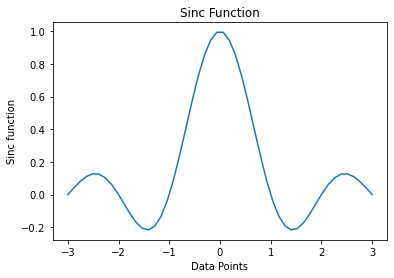

In [9]:
# Let's plot the data poiunts against the sinc function using matplotlib package
plt.plot(x, y)
plt.title('Sinc Function')
plt.xlabel('Data Points')
plt.ylabel('Sinc function')
plt.show()

In [40]:
# Let's get the Gaussian function and it as a noise to the sinc function
# First let's calculate the Mean and the Variance of the 50 datapoints

mn = st.mean(y)
va = st.variance(y)

# We will define a function that calcules the gausian function of the value that is being passed. In our case we will pass the sinc function.
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)


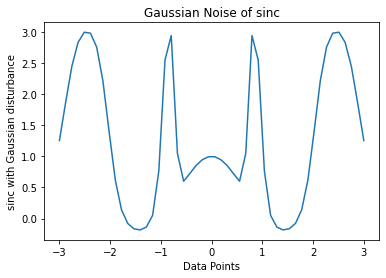

In [43]:
# Add the above Gaussian noise to the sinc function and plot the same

plt.plot(x,y+gaussian(y, mn, va))
plt.title('Gaussian Noise of sinc')
plt.xlabel('Data Points')
plt.ylabel('sinc with Gaussian disturbance')
plt.show()

**Training SVM Model**

In [78]:
# svm regression model can be imported from sklearn
from sklearn.svm import SVR


For a SVM regression we need to define the kernel rbf- Radial basis function as we are plotting the sinc function of variables. The kernel is what defines the hyperplane in the dimensional space.

The gamma is set to 0.5 which is the kernel coefficient for the radial basis function.

The epsilon specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value. Here we have set the epsilon as 0.01

The C is the regularization parameter and we have set it to 1000

In our model the output variable is the sinc function with gaussian noise while the regressor is the 50 datapoints.

In [93]:
# Fir the Support Vector Regression model for the sinc function
svr = SVR(kernel='rbf', C=1e3, gamma = 0.5, epsilon = 0.01)
model = svr.fit(x.reshape(50,1), y+gaussian(y, mn, va))

In [94]:
model

SVR(C=1000.0, epsilon=0.01, gamma=0.5)

In [95]:
# Let's predict the values using the models predict function
pred = model.predict(x.reshape(50,1))

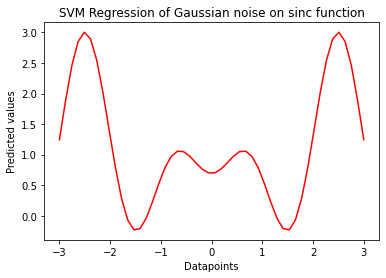

In [99]:
plt.plot(x,pred, c='red')
plt.xlabel('Datapoints')
plt.ylabel('Predicted values')
plt.title('SVM Regression of Gaussian noise on sinc function')
plt.show()

In [100]:
model.score(x.reshape(50,1), y+gaussian(y, mn, va))

0.7471102288436375

The score function returns the R-squared for the model. From the above we can see that the overall model score of our SVM regression is 0.75

Let us build the model without the gaussian noise

In [101]:
svr_n = SVR(kernel='rbf', C=1e3, gamma = 0.5, epsilon = 0.01)
model_n = svr_n.fit(x.reshape(50,1), y)

In [102]:
model_n

SVR(C=1000.0, epsilon=0.01, gamma=0.5)

In [103]:
# Let's predict the regression outcome
pred_n = model_n.predict(x.reshape(50,1))

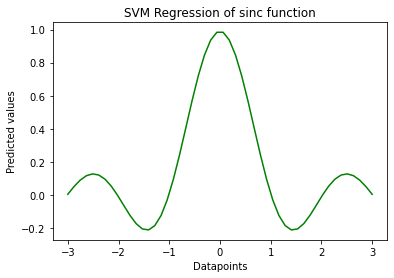

In [104]:
plt.plot(x,pred_n, c='green')
plt.xlabel('Datapoints')
plt.ylabel('Predicted values')
plt.title('SVM Regression of sinc function')
plt.show()

In [105]:
model_n.score(x.reshape(50,1), y)

0.9995596906182458

For the model without the Gaussian noise we can see that the R-squared is almost 1.00